In [1]:
# from uvb_abun_pairwise_compare import *

import numpy as np
import matplotlib.pyplot as plt
import pickle
import h5py
import numpy as np

In [13]:
sal_name = "/mnt/scratch/tairaeli/pair_comp_5_22/halo2392/redshift2.0/FG_2009/data/salsa_out_dict.pickle"
dat = None

with open(sal_name,"rb") as file:
    dat = pickle.load(file)

for key in dat["C II"]["FG_2009"].keys():
    print(key)

name
wave
redshift
col_dens
delta_v
vel_dispersion
interval_start
interval_end
density
temperature
metallicity
radius
gas
lightray_index


In [25]:
nvar = len(str(var))

print(nvar)

2


In [10]:
with h5py.File("/mnt/scratch/tairaeli/pair_comp_5_22/halo2392/redshift2.0/rays/ray000.h5", "r") as f:
    print(f["grid"].keys())
    dens = np.array(f['grid']["density"])
    temp = np.array(f['grid']["temperature"])
    met = np.array(f['grid']["metallicity"])

<KeysViewHDF5 ['H_nuclei_density', 'H_p0_number_density', 'density', 'dl', 'dx', 'dy', 'dz', 'l', 'metallicity', 'radius', 'redshift', 'redshift_dopp', 'redshift_eff', 'relative_velocity_x', 'relative_velocity_y', 'relative_velocity_z', 'temperature', 'velocity_los', 'x', 'y', 'z']>


In [2]:
with open("/mnt/scratch/tairaeli/pair_comp_5_22/halo2392/redshift2.0/FG_2009/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    fg_2009 = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/pair_comp_5_22/halo2392/redshift2.0/FG_2020/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    fg_2020 = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/pair_comp_5_22/halo2392/redshift2.0/PCW_2019/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    pcw_2019 = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/pair_comp_5_22/halo2392/redshift2.0/HM_2012/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    hm_2012 = pickle.load(salsa_dat)

In [18]:
def proc_uvb_dat(sal_out, ray, uvb_name, ion):
    """
    Turns salsa output clouds to a more plot-friendly format

    args:

        sal_out (dict): output from SALSA

        ray (str): ray number 

        uvb_name (str): name of uvb being looked at

        ion (str): ion of interest
    """

    spec_dat = sal_out[ion][uvb_name][sal_out[ion][uvb_name]["lightray_index"] == ray]

    hi = spec_dat["interval_end"].max()
    lo = spec_dat["interval_start"].min()

    out_arr = np.zeros(hi)

    for row in spec_dat.index:
        row_dat = spec_dat.iloc[row]

        start = row_dat["interval_start"]
        end = row_dat["interval_end"]

        # out_arr[start:end] = row_dat["col_dens"]
        out_arr[start:end] = 1

    return out_arr

hm_dens_pat = proc_uvb_dat(hm_2012,"000","HM_2012","C IV")
pcw_dens_pat = proc_uvb_dat(pcw_2019,"000","PCW_2019","C IV")
fg09_dens_pat = proc_uvb_dat(fg_2009,"000","FG_2009","C IV")
fg20_dens_pat = proc_uvb_dat(fg_2020,"000","FG_2020","C IV")

(220.0, 1000.0)

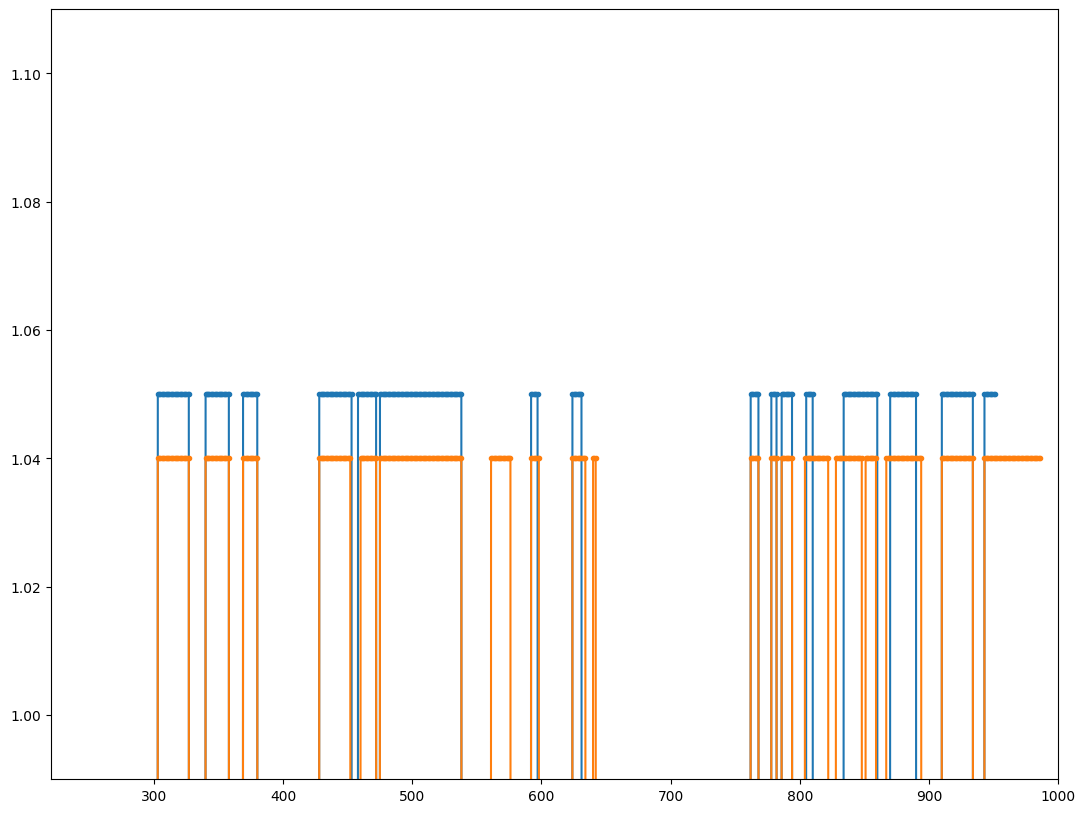

In [29]:

plt.figure(figsize = [13,10])
plt.plot(hm_dens_pat+0.05, label = "HM 2012", marker = ".")
plt.plot(pcw_dens_pat+0.04, label = "PCW 2019", marker = ".")

plt.ylim([0.99,1.11])
plt.xlim([220,1000])